# Assignment 5

In [6]:
#Import packages
import matplotlib.pyplot as plt
import numpy as np 
import math 
import cv2
import os
import PIL
from PIL import Image
import skimage 
from skimage import filters, feature, color

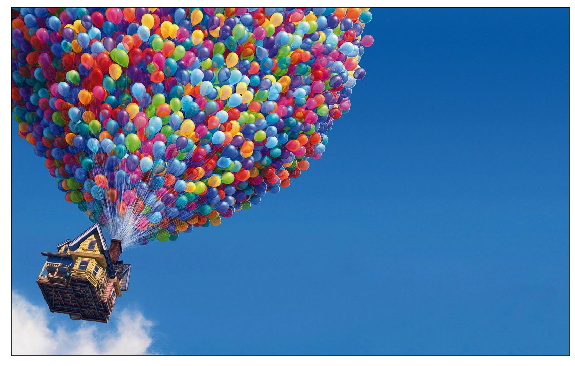

In [26]:
#Load and display image
img_path = r'C:\Users\kbchi\Documents\school\csc481-image-processing\assignments\assignment-5\up-balloons.jpg'
img = cv2.imread(img_path)  
#Convert to rgb
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#Plot image
fig = plt.figure()
plt.imshow(img2)
fig.set_size_inches(10, 10)
plt.xticks([]), plt.yticks([])
plt.show()

## Problem 1: Edge Detection with Color
Edge Detection with Color (10/10)
Choose a color image. Convert it to grayscale using an average of all three color channels and
find the edges (anyway you like). Then, convert the original image to HSI, and find edges on
the I component using the same method you used for the grayscale image. Finally, find edges on
the H component using the same method. Compare the three edge images you found and discuss
similarities and/or differences that you notice. Make sure to include in your comparison which
method gave you the best results and why you think so.

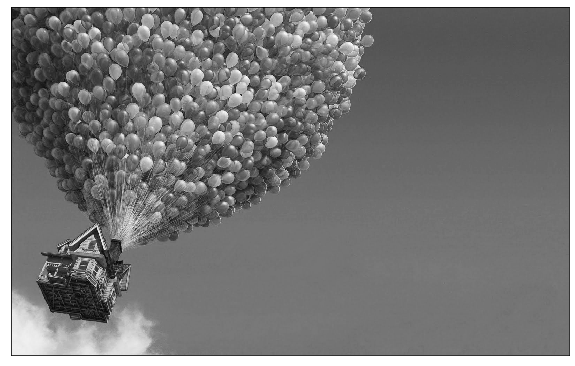

In [27]:
#Convert to greyscale
avg_rgb = np.mean(img2, axis = 2)
#Plot image
fig = plt.figure()
plt.imshow(avg_rgb, cmap = 'gray')
fig.set_size_inches(10, 10)
plt.xticks([]), plt.yticks([])
plt.show()

<Figure size 432x288 with 0 Axes>

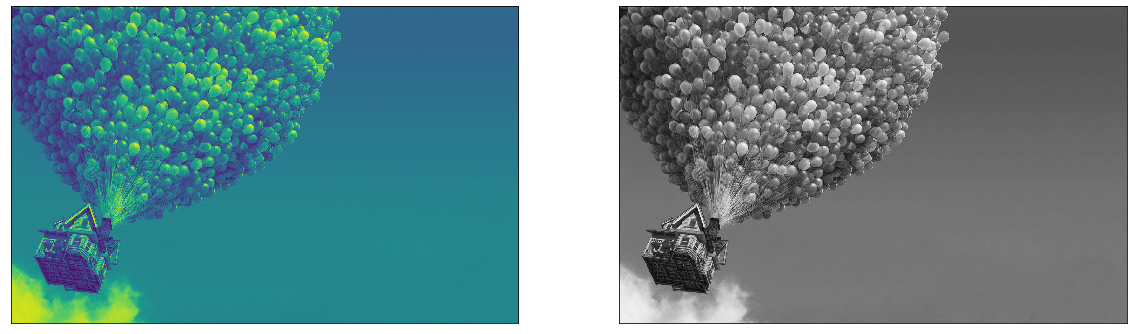

In [14]:
#Convert to greyscale
avg_rgb = np.mean(img2, axis = 2)

# Plot images
plt.clf()
fig = plt.figure()
fig.set_size_inches(20, 20)
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(avg_rgb)
plt.xticks([]), plt.yticks([])
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(avg_rgb, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

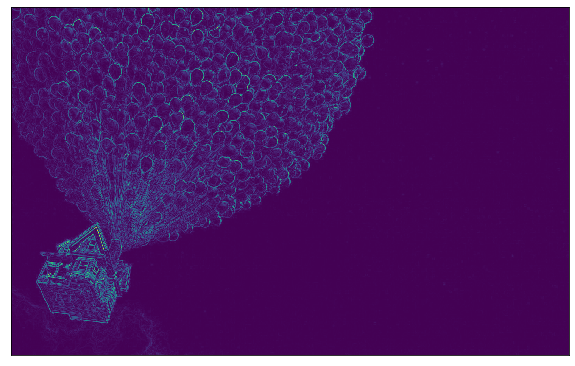

In [18]:
#Detect edges with sobel 
sobel_img = filters.sobel(avg_rgb)
fig = plt.figure()
plt.imshow(sobel_img)
fig.set_size_inches(10, 10)
plt.xticks([]), plt.yticks([])
plt.show()

In [24]:
#HSI 
hsi_img = cv2.cvtColor(img2, cv2.COLOR_RGB2HLS)

#Split channels
h, s, i = cv2.split(hsi_img)

#Edges for i component
sobel_i = filters.sobel(i)
#Edges for h component
sobel_h = filters.sobel(h)

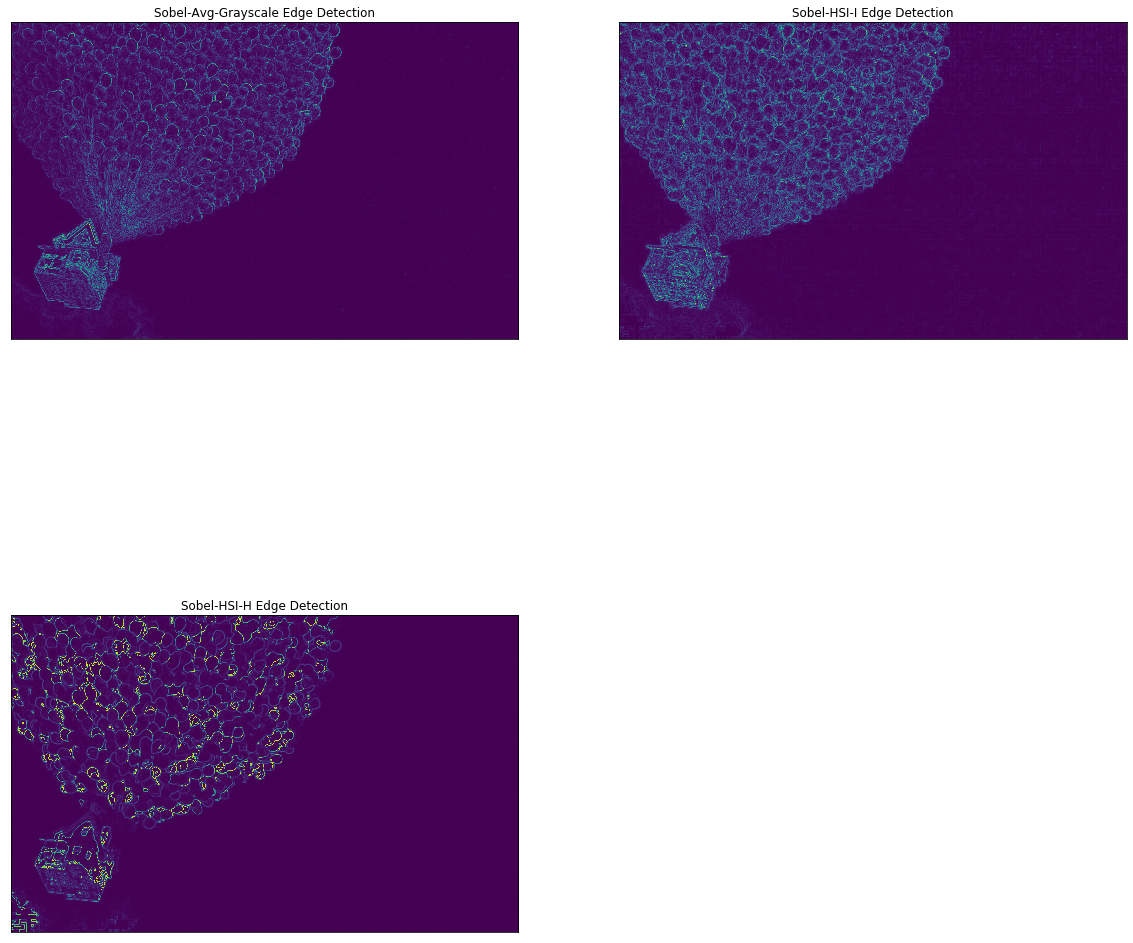

In [25]:
#Plotting edge images
rows = 2
cols = 2
axes = []
fig = plt.figure()

images = [sobel_img, sobel_i, sobel_h]
edges = ['Sobel-Avg-Grayscale', 'Sobel-HSI-I', 'Sobel-HSI-H']

for i in range((rows * cols) - 1):
    img_ = images[i]
    fig.set_size_inches(20, 20)
    axes.append(fig.add_subplot(rows, cols, i + 1))
    subplot_title = ("{0} Edge Detection".format(edges[i]))
    axes[-1].set_title(subplot_title)  
    plt.xticks([]), plt.yticks([])
    plt.imshow(img_)

#### Thoughts 

One big similarity is in the shapes of the balloons. Even though the sobel-h image has higher intesity, the shapes of the balloons are still quite obvious. The bottom left of the image is different between all three. The initial sobel edges show almost nothing there, while the sobel-i shows a little more, and the sobel-h shows the most. The sobel-h makes it look like there is a house there, though they are just clouds. I think the sobel-i shows them the best. Overall, I think the original sobel edges are the best visually. The sobel-i and sobel-h have are a little too high on the intensity, which makes some of the edges harder to detect. 

________

## Problem 2: Color Segmentation
A natural cue to use in segmenting objects from their surroundings in images is color. This
problem contrasts segmenting color regions using red, green, and blue thresholds (aligned
with the RGB axes of color space) with segmentation using hue, saturation, and intensity
bounds (aligned with the coordinate system of HSI or HSV space). For this assignment, it will be
more educational to choose an image with strongly colored objects. For example, an image of
party balloons works well – make sure they are on a dark or light background.  

a) (10/10) First, segment your image into objects and background using a threshold on the intensity
of the pixels. You can get a grayscale image from an RGB image simply by averaging the three
color components of each pixel. Demonstrate your segmentation by replacing the background
pixels with a visually distinct color. (In fact, just the reverse -- replacing blue or green pixels with
those of some preset image -- is the technique used in TV or movies to superimpose objects against
some preset background. Since thresholding is used, this (and not fashion) is why so few
weathercasters wear saturated blue items. This technique is called travelling matte. Blue is good
because it turns black under a red filter; green is good because most digital cameras have less noise
in the green channel. Matte techniques have become even more sophisticated as digital video
becomes more sophisticated).  

b) (10/10) Second, use thresholds in each RGB color band to isolate the objects in your image.
Again, display the results by "bluing out" the intended object region. Provide some commentary
on how the segmentation succeeded and failed. (481 Students (5): use an automatic thresholding
approach instead of choosing thresholds by hand. Hint: look at otsuthresh.)  

c) (10/10) Repeat the segmentation using thresholds of hue in HSI space. MatLab has a function
for converting from RGB to HSI (MatLab calls it HSV):  

B = rgb2hsv(A);  

Note: When described in matlab's HSV space, the hue (first component) of a pixel ranges from 0.0
(red) to 1.0 (red again), passing through orange, yellow, green, cyan, blue, purple, and magenta
along the way. The second component, saturation, varies from 0.0 (grayscale) to 1.0 (completely
saturated -- no white at all). The final component, intensity (or "value"), also ranges from 0.0 (no
intensity) to 1.0 (max intensity). 

There is also an inverse function  

A = hsv2rgb(B);
It returns an RGB image with pixel components between 0.0 and 1.0  

Note: A "threshold" of the hue component of pixels must be an interval, because the hue actually
wraps around and is best envisioned as a circle. Thus, to segment a blue region, you need to accept
only hues around 2/3 (0 = red, 1/3 = green, 2/3 = blue).  

How does your segmentation based on hue differ from your segmentations based on RGB?


_____

### Part a

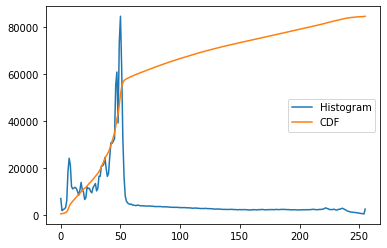

In [29]:
#Convert to greyscale
avg_rgb = np.mean(img2, axis = 2)

#Pixel frequencies
frequencies = cv2.calcHist([img2], [0], None, [256], [0,256]) 

#CDF
cdf = frequencies.cumsum()
cdf_norm = cdf * frequencies.max()/cdf.max()

#Plot histogram
plt.plot(frequencies, label = 'Histogram')
plt.plot(cdf_norm, label = 'CDF')
plt.legend()

plt.show() 